In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from datetime import datetime
# import mpl_axes_aligner
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

# import seaborn as sns
import zipfile
from cycler import cycler

pd.options.display.float_format = '{:.4f}'.format


# global plotting settings
# plt.style.use(['ggplot'])
# plt.style.use('dark_background')
# plt.style.use('default')
plt.style.use('seaborn-v0_8-colorblind')
default_cycler = (plt.rcParams['axes.prop_cycle'][:4]  +
                  cycler(linestyle=['-', '--', ':', '-.']))

plt.rcParams.update({'axes.grid' : True, 
#                      'axes.facecolor' : 'white', 
                     'axes.edgecolor' : '.15',
#                      'axes.labelcolor' : 'black',
                     'yaxis.labellocation' : 'center',
                     'lines.marker' : '.',
                     'lines.linestyle' : 'None',
                     'grid.color' : '.8',
                     'axes.prop_cycle' : default_cycler,
                     'figure.figsize' : (10*1.8, 5.65*1.8),
                     'mathtext.default' : 'regular'
                    })
point_marker_style = dict(ls='', markersize = 2)

# plt.rc('axes', prop_cycle=default_cycler)

In [13]:
def plot_featureimportance(results):
    fig, axs = plt.subplots(
        # 3,4, 
                            figsize = (15,10)
                           )
    
    # for i, ax in enumerate(axs.flatten()): 
    #     param = param_names_ordered[i]
    model = results[f'model']
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
    
    forest_importances.plot.bar(yerr=std, ax=axs)
        # ax.set_title(f'Param: {param}')
    
    fig.supylabel("Mean decrease in impurity")
    fig.suptitle(f"Feature importances using MDI")
    fig.tight_layout()
    fn = f'RF_featureimportance_rand{rand_state}_{datetime.now().strftime("%Y-%m-%d-%H%M")}'
    plt.savefig(os.path.join(os.getcwd(), 'output', fn), dpi=200)
    plt.show()

In [3]:
dir_ams = os.path.join(os.getcwd(), 'US-AMS', 'AMF_US-AMS_BASE_HH_1-5')
files = os.listdir(dir_ams)
fp = os.path.join(dir_ams, [f for f in files if 'BASE' in f][0])
# fp = os.path.join(os.getcwd(), 'US-AMS', 'AMF_US-AMS_BASE_HH_1-5', 'AMF_US-AMS_BASE_HH_1-5.csv')
ams = pd.read_csv(fp, header = 2, index_col = 'TIMESTAMP_END', parse_dates=True, na_values = -9999)
ams.index = ams.index.set_names(None)

In [4]:
ams

,TIMESTAMP_START,TAU,TAU_SSITC_TEST,H,H_SSITC_TEST,LE,LE_SSITC_TEST,FC_SSITC_TEST,FH2O,FCH4,...,TS_58_1_1,TS_59_1_1,TS_60_1_1,TS_61_1_1,TS_62_1_1,TS_63_1_1,TS_64_1_1,TS_65_2_1,TS_65_3_1,FC
2022-01-01 00:30:00,202201010000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 01:00:00,202201010030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 01:30:00,202201010100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 02:00:00,202201010130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-01 02:30:00,202201010200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-20 13:00:00,202312201230,-0.0261,0.0000,NaN,0.0000,NaN,0.0000,0.0000,NaN,NaN,...,2.7000,3.0000,2.7000,2.3500,NaN,NaN,2.5000,3.1000,4.3000,-5.2398
2023-12-20 13:30:00,202312201300,-0.0883,1.0000,80.6049,1.0000,13.4609,1.0000,1.0000,0.3010,3.5551,...,2.7000,2.9600,2.7000,2.3000,NaN,NaN,2.5000,3.1000,4.2400,-2.8111
2023-12-20 14:00:00,202312201330,-0.0292,1.0000,32.8048,0.0000,8.3443,0.0000,1.0000,0.1865,-3.7165,...,2.7000,2.9000,2.7000,2.3000,NaN,NaN,2.5000,3.0700,4.2000,-2.2633
2023-12-20 14:30:00,202312201400,-0.0437,0.0000,50.3949,0.0000,11.6250,0.0000,0.0000,0.2598,8.4019,...,2.7000,2.9000,2.7000,2.3000,NaN,NaN,2.5000,3.0000,4.2000,0.2794


In [5]:
ams.columns

Index(['TIMESTAMP_START', 'TAU', 'TAU_SSITC_TEST', 'H', 'H_SSITC_TEST', 'LE',
       'LE_SSITC_TEST', 'FC_SSITC_TEST', 'FH2O', 'FCH4',
       ...
       'TS_58_1_1', 'TS_59_1_1', 'TS_60_1_1', 'TS_61_1_1', 'TS_62_1_1',
       'TS_63_1_1', 'TS_64_1_1', 'TS_65_2_1', 'TS_65_3_1', 'FC'],
      dtype='object', length=176)

In [6]:
swc_cols = ams.columns[ams.columns.str.contains('SWC') & ams.columns.str.contains('_1_1')].values
ts_cols = ams.columns[ams.columns.str.contains('TS') & ams.columns.str.contains('_1_1')].values


In [18]:
ams.columns[ams.columns.str.contains('WD')]

Index(['WD'], dtype='object')

In [7]:
ams['TS_MEAN'] = ams[ts_cols].mean(axis=1)
ams['SWC_MEAN'] = ams[swc_cols].mean(axis=1)

In [8]:
predictors = np.array([
    'GPP_PI_F',
    'RECO_PI',
    'FC',
    'LE',
    'LE_PI_F',
    'TA',
    'SW_IN',
    'VPD_PI',
    'VPD_PI_F',
    'USTAR',
    'PA',
    'WD'
])
# predictors = np.concatenate([predictors, swc_cols, ts_cols])
predictors = np.concatenate([predictors, np.array(['TS_MEAN']), np.array(['SWC_MEAN']),] )

In [9]:
X = ams.loc[:, predictors]
mask_X = X.notna().all(axis=1)

y = ams.loc[:, 'FCH4']
mask_y = y.notna()

mask = (mask_X & mask_y)
X = X.loc[mask, :]
y = y.loc[mask]
n_samples, n_features = X.shape
feature_names=X.columns.values
results = {'X': X}

In [10]:
   
cn=y.index.values
max_depth = 100
rand_state = 0
regr = RandomForestRegressor(n_estimators=1000, max_depth=max_depth, random_state=rand_state)

regr.fit(X, y)

RandomForestRegressor(max_depth=100, n_estimators=1000, random_state=0)

In [11]:
results[f'model'] = regr
results[f'X'] = X
results[f'Y'] = y

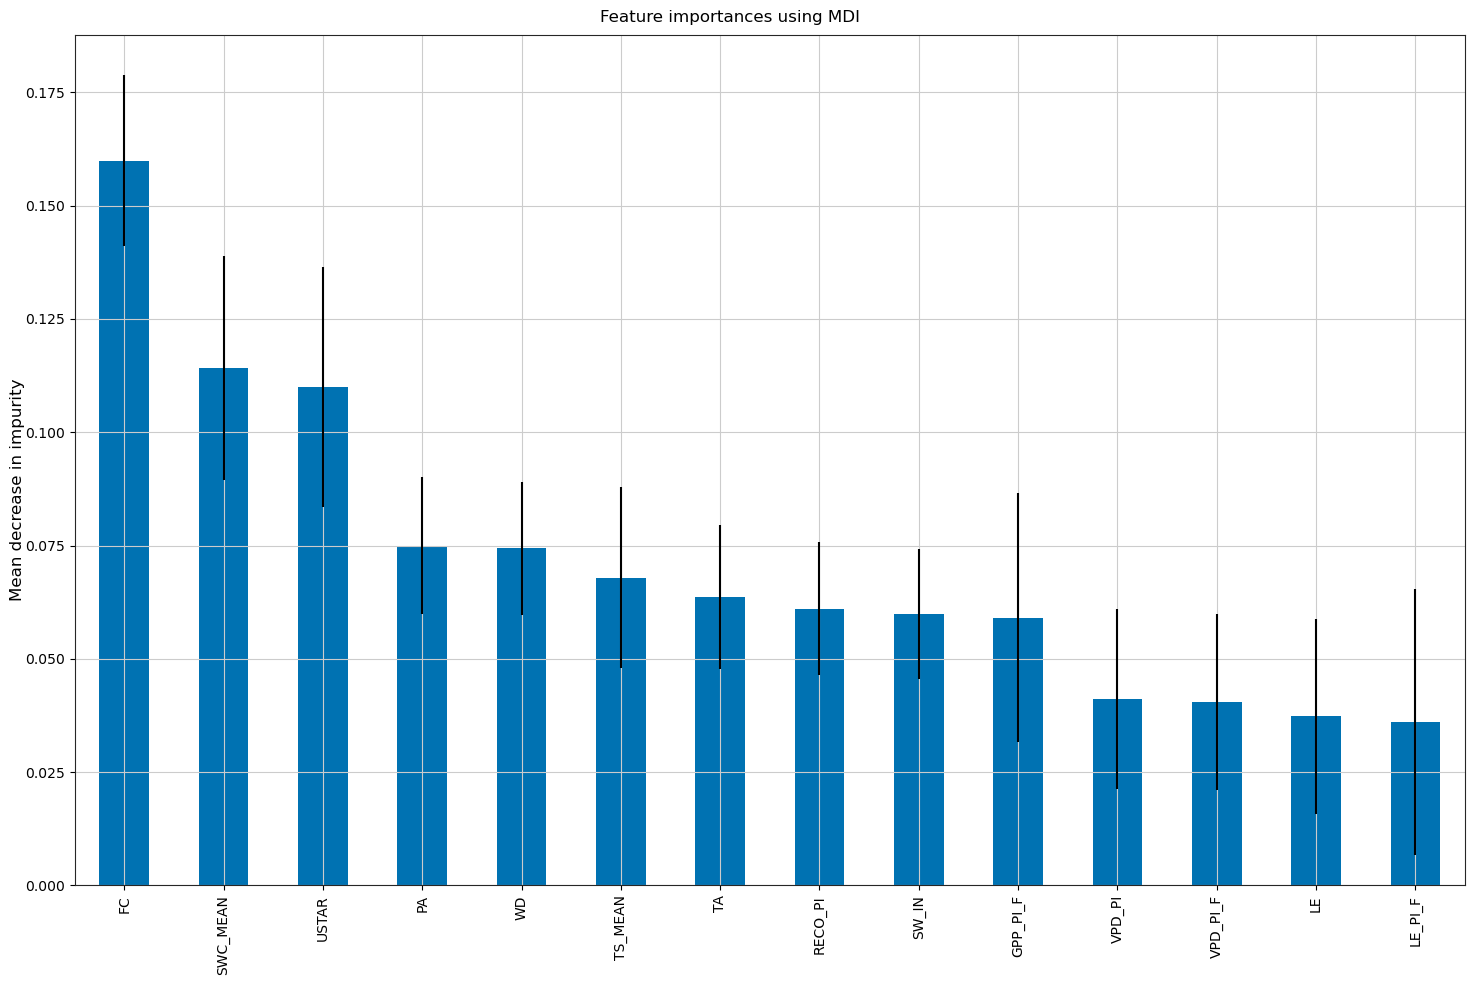

In [14]:
plot_featureimportance(results)

In [ ]:
# # Predict on new data
# y = regr.predict(X)
# # y_rf = regr_rf.predict(X_test)
# # model.fit(X, y)
